In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. Principal Component Analysis

Load and plot the "PCA.csv" data:

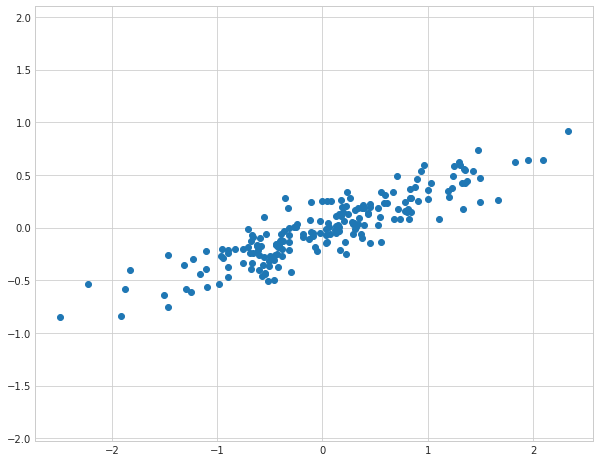

In [57]:
X1 = np.genfromtxt('PCA.csv',delimiter=',')
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    plt.scatter(X1[:, 0], X1[:, 1])
    plt.axis('equal');

Use sklearn's PCA to find 2 principal components on the X

In [58]:
# TODO 
# Fit a PCA with 2 components on the X (n_components=2)
pca = PCA(n_components=2)
pca.fit(X1)

PCA(n_components=2)

In [59]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


Print the explained variance of the eigenvectors:

In [60]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Draw the eigenvectors and the transformed datapoints:

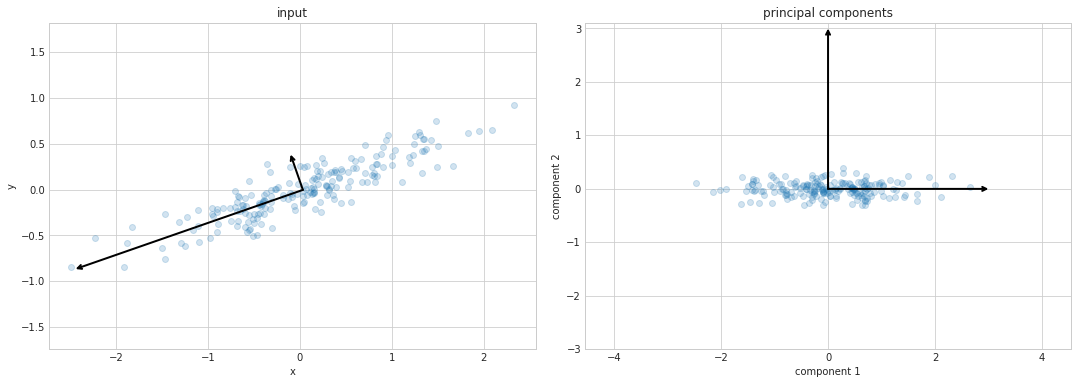

In [61]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

    # plot data
    ax[0].scatter(X1[:, 0], X1[:, 1], alpha=0.2)
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
    ax[0].axis('equal');
    ax[0].set(xlabel='x', ylabel='y', title='input')

    # plot principal components
    X_pca = pca.transform(X1)
    ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
    draw_vector([0, 0], [0, 3], ax=ax[1])
    draw_vector([0, 0], [3, 0], ax=ax[1])
    ax[1].axis('equal')
    ax[1].set(xlabel='component 1', ylabel='component 2',
              title='principal components',
              xlim=(-5, 5), ylim=(-3, 3.1))

Fit a sklearn PCA with only the first eigenvector:

In [62]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X1)
print("original shape:   ", X1.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Transform the X_pca back to 2 dimensions using pca.inverse_transform

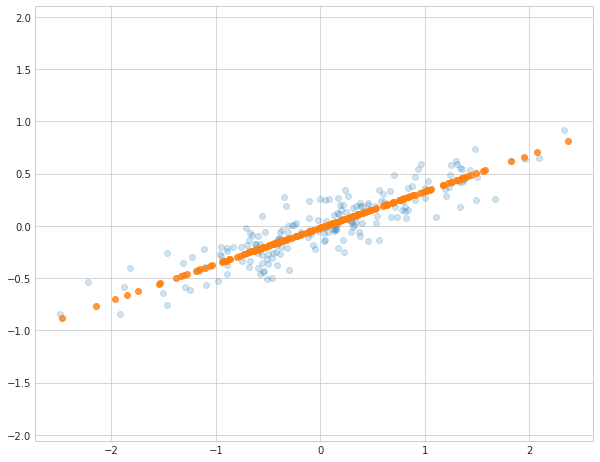

In [63]:
# TODO
# transform the X_pca back to two dimensions using pca.inverse_transform
X_new = pca.inverse_transform(X_pca)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,8))
    plt.scatter(X1[:, 0], X1[:, 1], alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
    plt.axis('equal');

Load the Iris dataset

In [64]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


extract features and labels in X2 and y2

In [65]:
# TODO
# Extract features and labels
X2 = df[['sepal_len', 'sepal_wid','petal_len', 'petal_wid']].to_numpy()
y2 = df['class'].to_numpy()

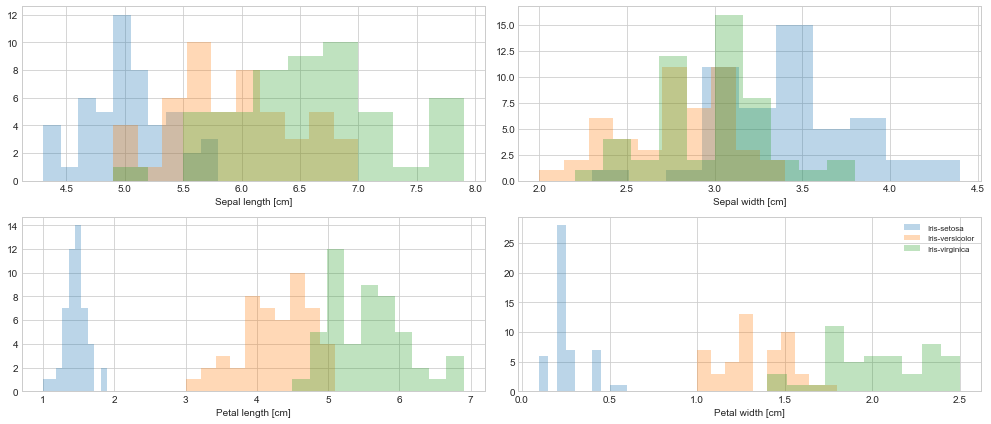

In [66]:
from matplotlib import pyplot as plt
import numpy as np
import math

def plot_histograms(X, y):
  label_dict = {1: 'Iris-Setosa',
                2: 'Iris-Versicolor',
                3: 'Iris-Virgnica'}

  feature_dict = {0: 'Sepal length [cm]',
                  1: 'Sepal width [cm]',
                  2: 'Petal length [cm]',
                  3: 'Petal width [cm]'}

  with plt.style.context('seaborn-whitegrid'):
      plt.figure(figsize=(14, 6))
      for cnt in range(4):
          plt.subplot(2, 2, cnt+1)
          for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
              plt.hist(X[y==lab, cnt],
                       label=lab,
                       bins=10,
                       alpha=0.3,)
          plt.xlabel(feature_dict[cnt])
      plt.legend(loc='upper right', fancybox=True, fontsize=8)

      plt.tight_layout()
      plt.show()

plot_histograms(X2, y2)

Standardize the datapoints using StandardScaler:

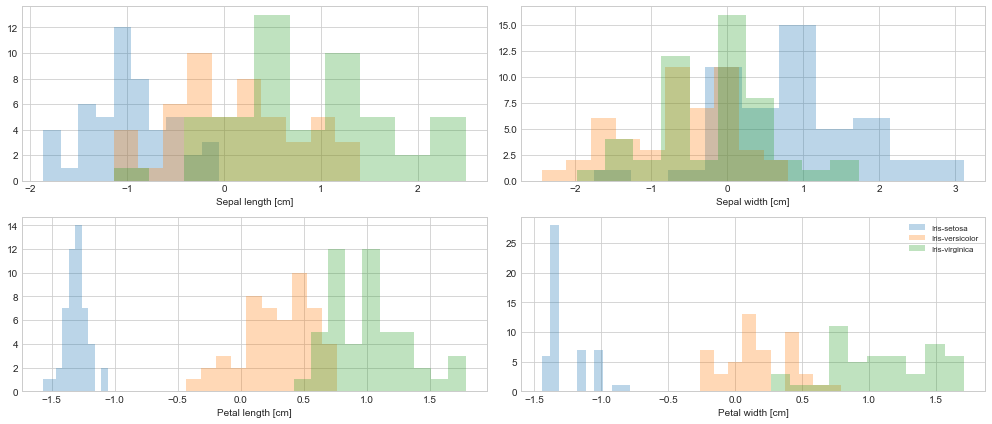

In [67]:
from sklearn.preprocessing import StandardScaler
# TODO
scaler = StandardScaler()
# Standardize the data and assign them to X_std
X_std = scaler.fit_transform(X2)
plot_histograms(X_std, y2)

Compute the covariance matrix

In [68]:
# TODO
# Complete the comput_cov using the formula given in the PDF file
def comput_cov(X):
    mean_vec = np.dot(X.T, X)
    cov_mat = (1/len(X)) * mean_vec
    return cov_mat
cov_mat = comput_cov(X_std)
print("Covariance matrix: \n%s" %comput_cov(X_std) )

Covariance matrix: 
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [69]:
def Sort_eigens(cov_mat):
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)

    print('Eigenvectors \n%s' %eig_vecs)
    print('\nEigenvalues \n%s' %eig_vals)
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(val, vec) for val, vec in zip(eig_vals, eig_vecs)]

    # Sort the (eigenvalue, eigenvector) tuples from high to low -> based on eigenvalue
    eig_pairs = sorted(eig_pairs, reverse=True)
    return eig_pairs
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = Sort_eigens(cov_mat)
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]
Eigenvalues in descending order:
2.9108180837520528
0.9212209307072246
0.14735327830509548
0.02060770723562544


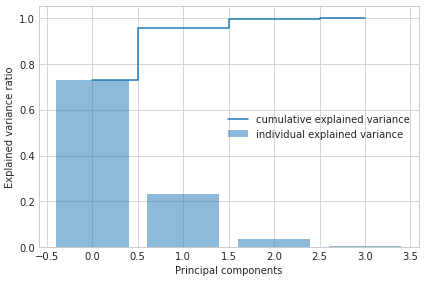

In [70]:
# TODO
# compute the explained and cumulative explained variance
eig_sum = sum(val for val , _ in eig_pairs)
var_exp = [(val/eig_sum) for val , _ in eig_pairs]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


Implement MY_PCA() for full PCA procedure:

In [71]:
def My_PCA(X,n_components):
    cov_mat = comput_cov(X)
    eig_pairs = Sort_eigens(cov_mat)
    matrix_wT = [] # initialize matrix_w
    for i in range(n_components): # pick the first n eigen vectors from the sorted eig_pairs
        matrix_wT.append(eig_pairs[i][1]) 
    matrix_wT = np.array(matrix_wT)
    matrix_w = matrix_wT.T
    # print(matrix_w.shape)
    print('Matrix W:\n %s' %matrix_w)
    Z = np.dot(X, matrix_w) # reduce the dimensions of X and assign them to Z
    return Z
Z = My_PCA(X2,2)

Eigenvectors 
[[ 0.75116805  0.28583096  0.49942378  0.32345496]
 [ 0.37978837  0.54488976 -0.67502499 -0.32124324]
 [ 0.51315094 -0.70889874 -0.05471983 -0.48077482]
 [ 0.16787934 -0.34475845 -0.54029889  0.74902286]]

Eigenvalues 
[6.13768706e+01 2.09402049e+00 8.02401290e-02 2.35354111e-02]
Matrix W:
 [[ 0.75116805  0.37978837]
 [ 0.28583096  0.54488976]
 [ 0.49942378 -0.67502499]
 [ 0.32345496 -0.32124324]]


Perform PCA from sklearn and see if the results match

In [72]:
# TODO
# use sklearn pca on iris data
pca = PCA(n_components=2)
sklearn_pca = pca.fit_transform(X2)
Z_sklearn = My_PCA(X2, 2)


Eigenvectors 
[[ 0.75116805  0.28583096  0.49942378  0.32345496]
 [ 0.37978837  0.54488976 -0.67502499 -0.32124324]
 [ 0.51315094 -0.70889874 -0.05471983 -0.48077482]
 [ 0.16787934 -0.34475845 -0.54029889  0.74902286]]

Eigenvalues 
[6.13768706e+01 2.09402049e+00 8.02401290e-02 2.35354111e-02]
Matrix W:
 [[ 0.75116805  0.37978837]
 [ 0.28583096  0.54488976]
 [ 0.49942378 -0.67502499]
 [ 0.32345496 -0.32124324]]


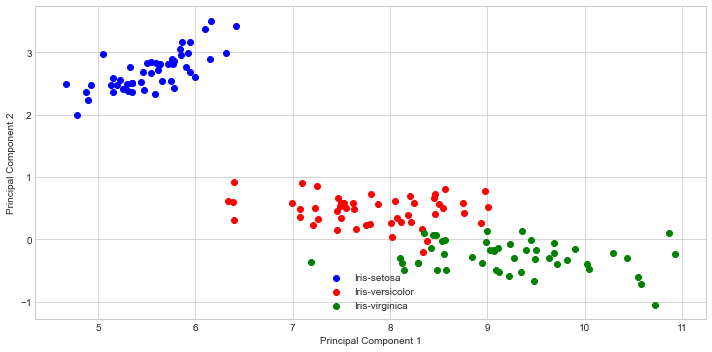

In [73]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 5))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(Z_sklearn[y2==lab, 0],
                    Z_sklearn[y2==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

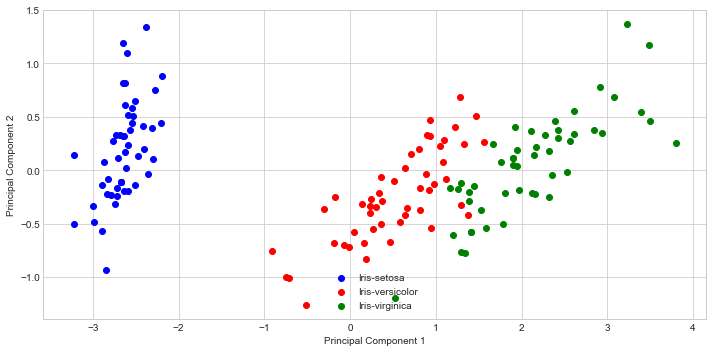

In [74]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 5))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                        ('blue', 'red', 'green')):
        plt.scatter(sklearn_pca[y2==lab, 0],
                    sklearn_pca[y2==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

# Autoencoders for dimensionality reduction

Load the fashion mnist.

In [75]:
from keras.datasets import fashion_mnist
(data, labels), (_, _) = fashion_mnist.load_data()

In [76]:
data = data.reshape(-1, 28*28) / 255. # scale the data features

In [77]:
from keras import models, layers
#TODO
# complete the function below for autoencoder
def dim_red_ae(data,n_dims_encoded=2):
    input_layer = layers.Input(shape=(28*28,))
    encoding_layer = layers.Dense(n_dims_encoded,activation='tanh')(input_layer)
    decoding_layer = layers.Dense(28*28,activation='tanh')(encoding_layer)
    autoencoder = models.Model(input_layer, decoding_layer)
    autoencoder.compile('adam', loss='mse')
    autoencoder.fit(x = data, y = data, epochs=5, use_multiprocessing=True)
    encoder = models.Model(input_layer, encoding_layer)
    return encoder,autoencoder

In [78]:
encoder,autoencoder = dim_red_ae(data,n_dims_encoded=2)
encodings = encoder.predict(data)

Epoch 1/5
1875/1875 [==============================] - 2s 989us/step - loss: 0.0627
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0473
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0466
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0464
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0463


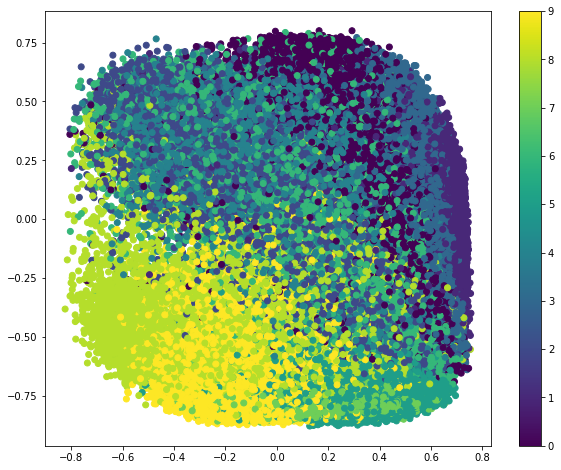

In [79]:
plt.figure(figsize=(10,8))
plt.scatter(encodings[:, 0], encodings[:, 1], c=labels)
plt.colorbar()

<Figure size 720x720 with 0 Axes>

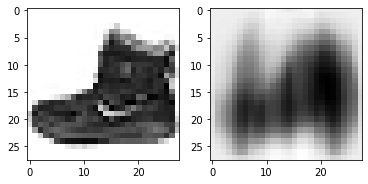

In [80]:
img = autoencoder.predict(data)
img = img[0].reshape(28,28)
plt.figure(figsize=(10, 10))
fig,ax = plt.subplots(1,2)
ax[0].imshow(data[0].reshape(28,28),cmap="Greys")
ax[1].imshow(img, cmap="Greys")

Train and run the autoencoder for 100 dimensions of the hidden layer:

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0183
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0111
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0104
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0101
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0099


<Figure size 720x720 with 0 Axes>

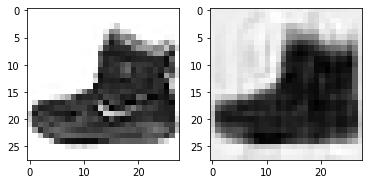

In [81]:
#TODO
encoder,autoencoder = dim_red_ae(data, n_dims_encoded=100)
img = autoencoder.predict(data)
img = img[0].reshape(28,28)
plt.figure(figsize=(10, 10))
fig,ax = plt.subplots(1,2)
ax[0].imshow(data[0].reshape(28,28),cmap="Greys")
ax[1].imshow(img, cmap="Greys")

In [82]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_val_test,y_train,y_val_test = train_test_split(
    data[:10000],
    labels[:10000],
    train_size=0.7,
)
X_val,X_test,y_val,y_test = train_test_split(
    X_val_test,
    y_val_test,
    train_size=0.5,
)

In [83]:
#TODO
# train and predict a KNN with K=3 on the training and test set and measure the time it takes.
import time
start = time.time()
model1 = KNeighborsClassifier().fit(X_train,y_train)
end = time.time()
acc = accuracy_score(model1.predict(X_val),y_val)
print("Time: %f"%(end - start))
print("Accuracy: %f"%(acc))

Time: 0.013152
Accuracy: 0.808000


perform cross validation to find the best number of hidden dimensions for hidden layer for dimensionality recudtion:

In [84]:
from sklearn.model_selection import cross_val_score
# TODO
# Perform K-fold cross validation with 5 folds to find the best number of hidden dimensions of autoencoder 
# for dimentionality reduction
acc_list = []
possible_dims = [2,5,7,10,15,20]
for dims in possible_dims:
    print("training for %d dimensions"%dims)
    encoder,autoencoder = dim_red_ae(X_train,dims)
    encodings = encoder.predict(X_train)
    clf = KNeighborsClassifier().fit(encodings,y_train)
    scores = cross_val_score(clf, encodings, y_train, cv=5)
    acc_list.append(np.mean(scores))
    print("for %d dims scores are :"%dims,scores)
    print("=========================================")
best_dim = possible_dims[np.argmax(acc_list)]
print("=========================================")
print("Best dim: %d"%(best_dim))

training for 2 dimensions
Epoch 1/5
219/219 [==============================] - 0s 1ms/step - loss: 0.1206
Epoch 2/5
219/219 [==============================] - 0s 1ms/step - loss: 0.0750
Epoch 3/5
219/219 [==============================] - 0s 1ms/step - loss: 0.0617
Epoch 4/5
219/219 [==============================] - 0s 1ms/step - loss: 0.0547
Epoch 5/5
219/219 [==============================] - 0s 1ms/step - loss: 0.0515
for 2 dims scores are : [0.49285714 0.49642857 0.48       0.48357143 0.50642857]
training for 5 dimensions
Epoch 1/5
219/219 [==============================] - 1s 1ms/step - loss: 0.0978
Epoch 2/5
219/219 [==============================] - 0s 1ms/step - loss: 0.0551
Epoch 3/5
219/219 [==============================] - 0s 1ms/step - loss: 0.0461
Epoch 4/5
219/219 [==============================] - 0s 1ms/step - loss: 0.0422
Epoch 5/5
219/219 [==============================] - 0s 1ms/step - loss: 0.0398
for 5 dims scores are : [0.68428571 0.68071429 0.68571429 0.7      

perform model evaluation with best_dim on the test set and measure the time of training and predicting of KNN (K=3)

In [85]:
# TODO
# model evaluation on the test set.
encoder,autoencoder = dim_red_ae(X_train,best_dim)
encodings = encoder.predict(X_train)
start = time.time()
model1 = KNeighborsClassifier().fit(encodings,y_train)
acc = accuracy_score(model1.predict(encoder.predict(X_val)),y_val)
end = time.time()
print("Time: %f"%(end - start))
print("Accuracy: %f"%(acc))

Epoch 1/5
219/219 [==============================] - 1s 1ms/step - loss: 0.0674
Epoch 2/5
219/219 [==============================] - 0s 1ms/step - loss: 0.0364
Epoch 3/5
219/219 [==============================] - 0s 1ms/step - loss: 0.0296
Epoch 4/5
219/219 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 5/5
219/219 [==============================] - 0s 1ms/step - loss: 0.0248
Time: 0.404442
Accuracy: 0.812000
